# Learning Theory Homework 
***
**Name**: Pranav Kumar Sivakumar
***

This assignment is due on Moodle by **5pm on Friday March 9th**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

In this assignment you will explore the concepts of PAC learnability and VC dimension. 


### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

<img src="figs/triangles.png" width=400 height=50>  

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

Since there are finite amount of concepts in C, for any consistant learner the bound on the number of training examples if H=C is,

$$
m \geq \frac{1}{\epsilon}\left(\ln\left| H \right| + \ln\frac{1}{\delta} \right)
$$


**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

Since non-degenerate triangles are also allowed, to form a triangle we need to choose 3 **distinct points** (x,y), where x and y can take values from the interval [0,99], so the total number of combinations of 3 distinct points are,
$$
=> {{100*100}\choose{3}} = (166616670000)
$$


$$
\left| H \right| = (166616670000)
$$

Then, with the given $\epsilon = 0.15$ and $\delta = 0.05$, our bound will become as,

$$
m \geq \frac{1}{0.15}\left(\ln(166616670000) + \ln\frac{1}{0.05} \right) \approx 192.231
$$

Therefore m should be atleast **193** samples.

### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypthesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

The VC Dimension of the given class of hypotheses is $\textrm{VCdim}(H) = 2$.  Initially lets show that we can shatter a configuration of two points.

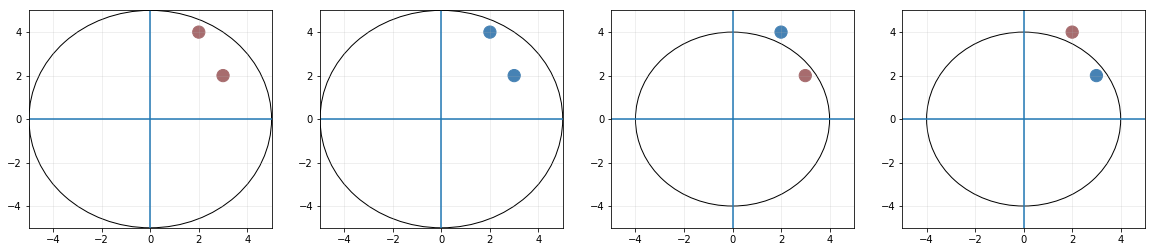

In [1]:
import matplotlib.pylab as plt
%matplotlib inline
mycolors = {"blue":"steelblue", "red":"#a76c6e",  "green":"#6a9373", "smoke":"#f2f2f2"}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
cc1 = plt.Circle((0,0), 5, fill=False)
cc2 = plt.Circle((0,0), 5, fill=False)
cc3 = plt.Circle((0,0), 4, fill=False)
cc4 = plt.Circle((0,0), 4, fill=False)
axes[0].add_patch(cc1)
axes[0].scatter([3,2], [2,4], color=[mycolors["red"], mycolors["red"]], s=150)
axes[0].set_xlim([-5,5]); axes[0].set_ylim([-5,5]); axes[0].grid(alpha=0.25)
axes[1].add_patch(cc2)
axes[1].scatter([3,2], [2,4], color=[mycolors["blue"], mycolors["blue"]], s=150)
axes[1].set_xlim([-5,5]); axes[1].set_ylim([-5,5]); axes[1].grid(alpha=0.25)
axes[2].scatter([3,2], [2,4], color=[mycolors["red"], mycolors["blue"]], s=150)
axes[2].add_patch(cc3)
axes[2].set_xlim([-5,5]); axes[2].set_ylim([-5,5]); axes[2].grid(alpha=0.25)
axes[3].scatter([3,2], [2,4], color=[mycolors["blue"], mycolors["red"]], s=150)
axes[3].add_patch(cc4)
axes[3].set_xlim([-5,5]); axes[3].set_ylim([-5,5]); axes[3].grid(alpha=0.25)
for i in range(4):
    axes[i].axvline(0)
    axes[i].axhline(0)

By above graphs, the first type of hypotheses helps in capturing the second and fourth configuration of the points, similarly the second type of hypotheses helps in capturing the first and third configuration of the points.
Hence, we can infer that the given class of hypotheses can shatter a configuration of 2 points.

Now for the upper bound, we have to prove that the same class of hypotheses can't shatter any set of 3 points.
For determining the decision boundary, we consider the radial distance of the point in the graph i.e., the distance of the (x,y) co-ordinates of the points from the origin (0,0) which is $r = \sqrt{x^2+ y^2}$

Let's take three points ${\bf x}_1, {\bf x}_2$, and ${\bf x}_3$ with their corresponding radial distance from the origin $r_1, r_2,$ and $r_3$. To avoid the loss of generality, the points are ordered such that $r_1 \leq r_2 \leq r_3$ and Let the labeling of the three points be $y_1 = +1$, $y_2 = -1$, and $y_3 = +1$. 

Our classifier for the first type of hypothesis can be defined by the decision rule $y_k = h_t(r_k) = 1$ if $r_k \leq t$ and $-1$ otherwise. If this dichotomy is captured then we will have both $r_1 \leq t$ and $r_3 \leq t$ as their labels are positive.  Therefore, $r_1 \leq r_2 \leq r_3 \leq t$. But there is a contradiction because $y_2 = -1$.

Similarly, the contradiction with the other type of hypothesis can be proved by applying the above settings in inverse.
i.e., the hypothesis $y_k = h_t(r_k) = 1$ if $r_k \geq t$ and $-1$ otherwise.

Hence, the configuration of any 3 points cannot be shattered. 

### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

In [9]:
import random
import numpy as np
#import scipy.stats as stats

class PAC:
    def __init__(self):
        self.normal = False
        
    def concept(self):
        self.con = sorted([round(random.uniform(0, 100), 2) for i in range(2)]) + sorted([round(random.uniform(0, 100), 2) for i in range(2)])
    
    def Normed(self,mean,sd,norm=False):
        self.normal, self.mean, self.sd = norm, mean, sd
    
    def rdm(self,n,a=0,b=100):
        if self.normal:
            return [round(np.random.normal(self.mean, self.sd), 2) for i in range(n)]
        return [round(random.uniform(a, b), 2) for i in range(n)]

    def rdm_pts(self,n):
        return [[self.rdm(n=1)[0],self.rdm(n=1)[0]] for i in range(n)]

    def label(self,points):
        self.concept()
        cx1,cx2,cy1,cy2 = self.con
        labels=[]
        for p in points:
            if (cx1<=p[0]<=cx2) and (cy1<=p[1]<=cy2):
                labels.append(True)
            else:
                labels.append(False)
        return labels
    
    def train_data(self,m):
        self.X = np.array(self.rdm_pts(m))
        self.y = self.label(self.X)
    
    def hypo(self):
        t=[i for i, x in enumerate(self.y) if x]
        Xt = self.X[np.ix_(t)]
        #Xf = X[np.ix_(list(set(range(len(y))) - set(t)))]
        self.hp = [np.amin(Xt[:,0]),np.amax(Xt[:,0]), np.amin(Xt[:,1]),np.amax(Xt[:,1])]
    
    def check(self,bound):
        bx1,bx2,by1,by2 = bound
        return np.array([True if (bx1<=p[0]<=bx2) and (by1<=p[1]<=by2) else False for p in self.X_test])
         
    def gen_err(self):
        self.X_test = self.rdm_pts(1000)
        y_cor = self.check(self.con)
        y_pred = self.check(self.hp)
        err = 1-(np.sum(np.equal(y_cor,y_pred))/float(len(y_cor)))
        return err
    
    def worst(self,m):
        errs=[]
        i,n=0,500
        while i<n:
            try:
                self.train_data(m)
                self.hypo()
                errs.append(self.gen_err())
            except:
                n=n+1
            i=i+1
        return np.percentile(sorted(errs),95)
    
    def partb(self,mvalues):
        evalues=[]
        for i in mvalues:
            evalues.append(self.worst(m=i))
        return evalues
    
p1 = PAC()
print("The generalization error is " + str(p1.worst(m=1500)))

The generalization error is 0.006


The number of runs in the above simulation is set to 500 and the training set size is set to 1500. The above value is the better approximation of the generalization error with delta as 0.05. Below is one example of concept rectangle and the computed hypothesis rectangle.

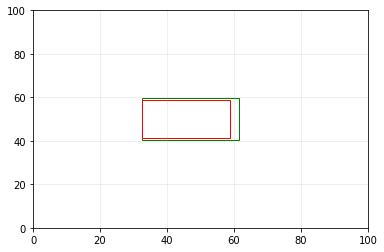

In [8]:
import matplotlib.patches as patches
p1.train_data(m=250)
p1.hypo()
c=p1.con
fig, axes = plt.subplots(1)
axes.add_patch(patches.Rectangle((c[0],c[2]),c[1]-c[0],c[3]-c[2],fill=False,edgecolor='g'))
axes.set_xlim([0,100]); axes.set_ylim([0,100]); axes.grid(alpha=0.25)
c=p1.hp
axes.add_patch(patches.Rectangle((c[0],c[2]),c[1]-c[0],c[3]-c[2],fill=False,edgecolor='r'))

**Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

In [4]:
pb = p1.partb([250,500,1000,1250,1500])

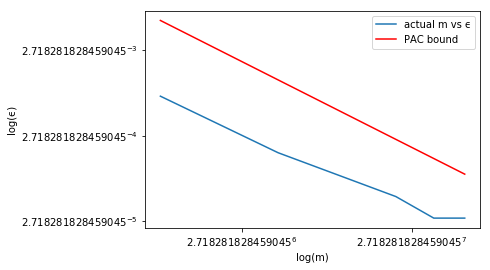

In [5]:
plt.loglog([250,500,1000,1250,1500],pb,basex=np.e, basey=np.e,label="actual m vs ϵ")
plt.xlabel("log(m)")
plt.ylabel("log(ϵ)")
pacb = [((4/m)*np.log(4/0.05)) for m in [250,500,1000,1250,1500]]
plt.loglog([250,500,1000,1250,1500],pacb,basex=np.e, basey=np.e,color='r',label="PAC bound")
plt.legend()

Above graph represents the log-log plot with m on the horizontal axes and ϵ on the vertical axis. Also the theoretical PAC bound (red line) is overlayed above the generate graph. Based on that, we can infer that our model has lesser generalizations errors than the PAC bound based errors. 

**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

In [6]:
mean,sd = 50,25
p1.Normed(mean,sd,True)
pb = p1.partb([250,500,1000,1250,1500])

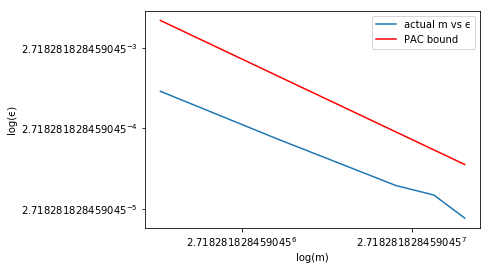

In [7]:
plt.loglog([250,500,1000,1250,1500],pb,basex=np.e, basey=np.e,label="actual m vs ϵ")
plt.xlabel("log(m)")
plt.ylabel("log(ϵ)")
pacb = [((4/m)*np.log(4/0.05)) for m in [250,500,1000,1250,1500]]
plt.loglog([250,500,1000,1250,1500],pacb,basex=np.e, basey=np.e,color='r',label="PAC bound")
plt.legend()

Similar to the previous graph, the above graph represents the log-log plot with m (training set generated using normal distribution with mean as 50 and standard deviations as 25) on the horizontal axes and ϵ on the vertical axis. Also the theoretical PAC bound (red line) is overlayed above the generate graph. Based on that, we can infer that our model with normal distribution also has lesser generalizations errors than the PAC bound based errors.